In [473]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hijos.ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hijos.ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hijos.ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [474]:
data = pd.read_csv('train.csv')

In [475]:
data['length'] = data['text'].str.len()
data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


**Limpieza de texto**

In [476]:
data['keyword'].fillna('no keyword', inplace = True) 
data['location'].fillna('no location', inplace = True)
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [477]:
data['clean_text'] = data['text'].str.lower()  

#Saco http y me quedo sólo con letras y espacios
def only_letters(tweet):
    tweet = re.sub(r'http\S*', '', tweet)
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    return tweet

In [478]:
data['clean_text'] = data['clean_text'].apply(only_letters)     
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this earthquake ma...
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,all residents asked to shelter in place are be...
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfires evacuation orders in...
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,just got sent this photo from ruby alaska as s...


In [479]:
#Tokenización
from nltk.tokenize import word_tokenize                           
data['clean_text'] = data['clean_text'].apply(word_tokenize)
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,"[our, deeds, are, the, reason, of, this, earth..."
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,"[all, residents, asked, to, shelter, in, place..."
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfires, evacuation, order..."
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,"[just, got, sent, this, photo, from, ruby, ala..."


In [480]:
#Elimino stopwords                                                                  
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

def filter_stopwords(tokenized_text):
    not_stopwords=[]
    for w in tokenized_text:
        if w not in stop_words:
            not_stopwords.append(w)
    return not_stopwords

In [481]:
data['clean_text'] = data['clean_text'].apply(filter_stopwords)                         
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,"[residents, asked, shelter, place, notified, o..."
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfires, evacuation, order..."
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [482]:
#Lemmatization                                                                       
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(tweet):
    lemmatized_words = []
    for word in tweet:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

In [483]:
data['clean_text'] = data['clean_text'].apply(lemmatize_tweet)                        
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,"[deed, reason, earthquake, may, allah, forgive..."
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,"[resident, asked, shelter, place, notified, of..."
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfire, evacuation, order,..."
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [484]:
data['clean_text'] = data['clean_text'].apply(lambda text:' '.join(text))                      
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified officer ...
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation order calif...
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire pour...


In [485]:
#USA y United States son sinónimos, vamos a reemplazar United States por USA                   
data['location']= np.where((data['location']=='United States'), 'USA', data['location'])

**Comienzo análisis**

In [486]:
data_grouped = data.groupby('target')        
false_tweets = data_grouped.get_group(0)
true_tweets = data_grouped.get_group(1)

#Nos fijamos cuantos tweets son verdaderos y cuantos falsos     

data_grouped['id'].count()

target
0    4342
1    3271
Name: id, dtype: int64

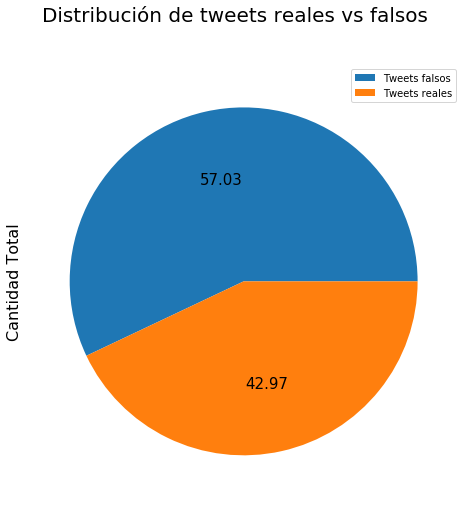

In [487]:
#Graficamos para ver la distribucion de tweets reales contra falsos 
data_grouped = data_grouped.agg({'target':'count'})
data_grouped.columns = ['Cantidad Total']

labels = ['Tweets falsos','Tweets reales']
title = 'Distribución de tweets reales vs falsos'
fig, ax= plt.subplots()
fig.suptitle(title, fontsize=20)
plt.ylabel('Cantidad Total', fontsize=16)
data_grouped['Cantidad Total'].plot(kind='pie',figsize=(10,8),autopct='%.2f',labels=['',''],fontsize=15)
ax.legend(labels);

**Análisis de longitud de tweets**

In [488]:
bins = range(0,160,10)

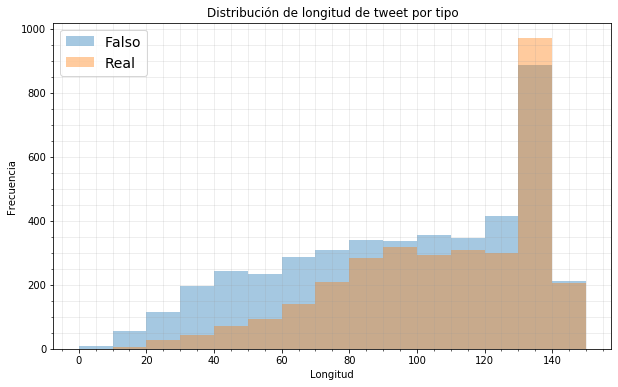

In [489]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

sns.distplot(false_tweets['length'],  kde=False, label='Falso', bins=bins)
sns.distplot(true_tweets['length'],  kde=False,label='Real', bins=bins)

plt.legend(prop={'size': 14})
plt.title('Distribución de longitud de tweet por tipo')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')

plt.minorticks_on()
plt.grid(which='both', color='#999999', linestyle='-', alpha=0.2)
plt.savefig('Histogram length by type')

Text(0.5, 0.98, 'Relación entre la longitud de los tweets y su veracidad')

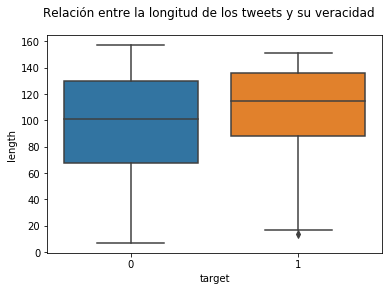

In [490]:
ax = sns.boxplot(x = "target", y="length", data=data)
fig = ax.get_figure()

fig.suptitle('Relación entre la longitud de los tweets y su veracidad')

Text(0.5, 0.98, 'Relación entre la longitud de los tweets y su veracidad')

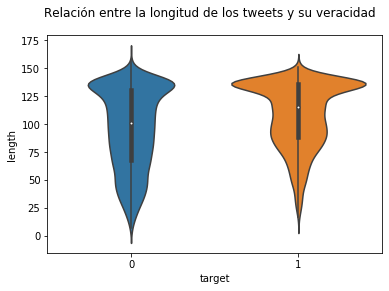

In [491]:
ax = sns.violinplot(x="target", y="length", data=data)
fig = ax.get_figure()

fig.suptitle('Relación entre la longitud de los tweets y su veracidad')

**Análisis de keywords**

In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7613 non-null   object
 2   location    7613 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   length      7613 non-null   int64 
 6   clean_text  7613 non-null   object
dtypes: int64(3), object(4)
memory usage: 416.5+ KB


In [493]:
grouped_by_keyword = data.groupby('keyword').agg({'target':'mean','length':'mean', 'text':'count'}).reset_index()
grouped_by_keyword.columns = ['keyword','target_mean','length_mean', 'count']
grouped_by_keyword

,keyword,target_mean,length_mean,count
0,ablaze,0.361111,94.694444,36
1,accident,0.685714,100.085714,35
2,aftershock,0.000000,101.205882,34
3,airplane accident,0.857143,106.400000,35
4,ambulance,0.526316,98.394737,38
...,...,...,...,...
217,wounded,0.702703,111.054054,37
218,wounds,0.303030,103.363636,33
219,wreck,0.189189,88.540541,37
220,wreckage,1.000000,122.256410,39


In [494]:
#Ordenado por % de reales
ordered_by_target_mean = grouped_by_keyword.sort_values(['target_mean'], ascending = False).head(15)
ordered_by_target_mean

,keyword,target_mean,length_mean,count
220,wreckage,1.000000,122.256410,39
70,derailment,1.000000,109.794872,39
62,debris,1.000000,107.594595,37
154,outbreak,0.975000,128.925000,40
206,typhoon,0.973684,111.394737,38
153,oil spill,0.973684,102.973684,38
188,suicide bombing,0.969697,108.575758,33
187,suicide bomber,0.967742,109.032258,31
32,bombing,0.931034,102.482759,29
186,suicide bomb,0.914286,119.285714,35


In [495]:
#Ordenado por media de longitud
grouped_by_keyword.sort_values(['length_mean'], ascending = False)

,keyword,target_mean,length_mean,count
167,rescuers,0.914286,129.342857,35
154,outbreak,0.975000,128.925000,40
79,devastation,0.750000,125.722222,36
27,body bag,0.030303,125.393939,33
92,emergency services,0.333333,125.363636,33
...,...,...,...,...
23,blizzard,0.108108,71.891892,37
181,smoke,0.088235,70.882353,34
174,screaming,0.055556,70.472222,36
175,screams,0.142857,70.428571,35


In [496]:
#Ordenado por count
grouped_by_keyword.sort_values(['count'],ascending=False)

,keyword,target_mean,length_mean,count
147,no keyword,0.688525,73.918033,61
104,fatalities,0.577778,108.088889,45
63,deluge,0.142857,111.166667,42
8,armageddon,0.119048,102.023810,42
29,body bags,0.024390,100.780488,41
...,...,...,...,...
115,forest fire,0.789474,99.947368,19
94,epicentre,0.083333,96.750000,12
195,threat,0.181818,99.818182,11
134,inundation,0.200000,94.300000,10


In [497]:
undefined_keywords_veracity = data[data.keyword == 'no keyword'].groupby('keyword').agg({'target':'mean'}) 
undefined_keywords_veracity.columns = ['target_mean']
undefined_keywords_veracity.head()
#promedio de veracidad de los tweets sin keywords:

,target_mean
keyword,
no keyword,0.688525


In [498]:
total_tweets = len(data.index)                                        
total_true_tweets = true_tweets['target'].count()
keyword_group = data.groupby('keyword').agg({'target':'sum'})
keyword_group.columns = ['target_sum']
keyword_group['total_target_percentage'] = (keyword_group['target_sum'] * 100)/total_true_tweets
keyword_group.sort_values(['total_target_percentage'],ascending=False).head(20)
#porcentaje del total de tweets verdaderos según su keyword

,target_sum,total_target_percentage
keyword,,
no keyword,42,1.284011
outbreak,39,1.192296
derailment,39,1.192296
wreckage,39,1.192296
typhoon,37,1.131153
debris,37,1.131153
oil spill,37,1.131153
rescuers,32,0.978294
suicide bomb,32,0.978294


Text(0, 0.5, 'keyword')

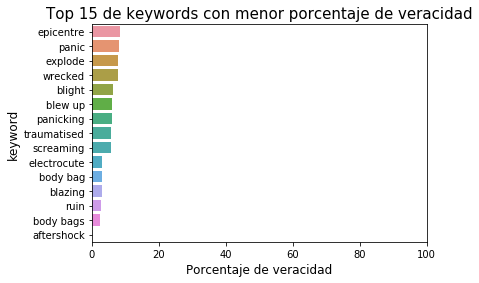

In [499]:
ordered_by_target_mean_tail = grouped_by_keyword.sort_values(['target_mean'],ascending=False).tail(15)
g = sns.barplot(x=ordered_by_target_mean_tail['target_mean']*100, y=ordered_by_target_mean_tail['keyword'], orient='h')
g.set_title("Top 15 de keywords con menor porcentaje de veracidad", fontsize=15)
g.set_xlabel("Porcentaje de veracidad", fontsize=12)
g.set(xlim=(0, 100))
g.set_ylabel("keyword", fontsize=12)

Text(0, 0.5, 'Keyword')

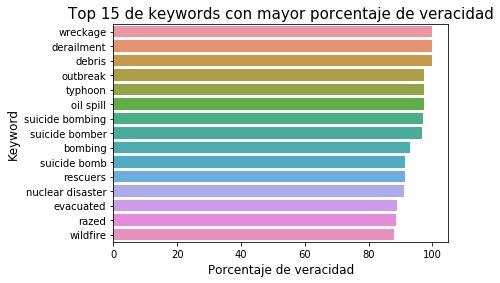

In [500]:
g = sns.barplot(x=ordered_by_target_mean['target_mean']*100, y=ordered_by_target_mean['keyword'], orient='h')
g.set_title("Top 15 de keywords con mayor porcentaje de veracidad", fontsize=15)                                                      
g.set_xlabel("Porcentaje de veracidad", fontsize=12)
g.set_ylabel("Keyword", fontsize=12)    

Text(0, 0.5, 'Keyword')

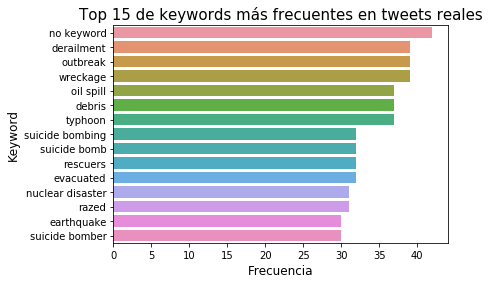

In [501]:
keywords_true_count = true_tweets.keyword.value_counts()          
keywords_false_count = false_tweets.keyword.value_counts()
g = sns.barplot(x=keywords_true_count[:15,].values, y=keywords_true_count[:15,].index, orient='h')
g.set_title("Top 15 de keywords más frecuentes en tweets reales", fontsize=15)
g.set_xlabel("Frecuencia", fontsize=12)
g.set_ylabel("Keyword", fontsize=12)   

Text(0, 0.5, 'Keyword')

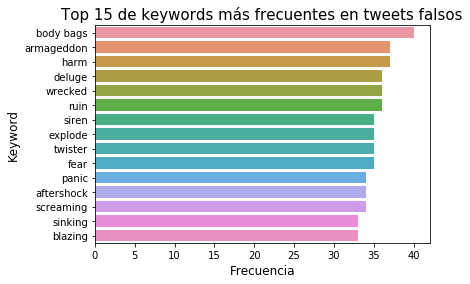

In [502]:
g = sns.barplot(x=keywords_false_count[:15,].values, y=keywords_false_count[:15,].index, orient='h')     
g.set_title("Top 15 de keywords más frecuentes en tweets falsos", fontsize=15)
g.set_xlabel("Frecuencia", fontsize=12)
g.set_ylabel("Keyword", fontsize=12)

Text(0, 0.5, 'Longitud de tweet')

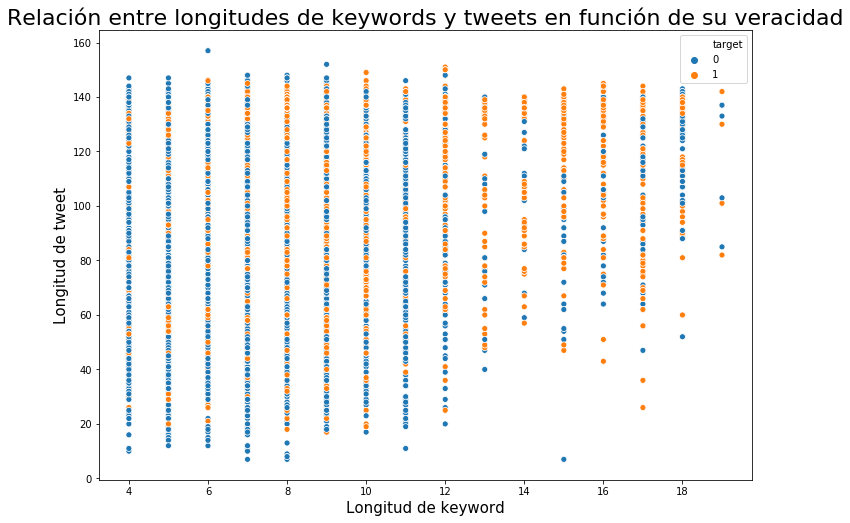

In [503]:
#Relación entre longitudes de keywords y tweets en función de su veracidad                        
data2 = data
data2['keyword_length'] = data2['keyword'].str.len()
data2 = data2[data2.keyword != 'no keyword']   #no incluimos a los no keyword para este análisis
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.scatterplot(x = "keyword_length", y = "length", hue = "target", data = data2, ax = ax)
g.set_title("Relación entre longitudes de keywords y tweets en función de su veracidad", fontsize=22)
g.set_xlabel("Longitud de keyword", fontsize=15)
g.set_ylabel("Longitud de tweet", fontsize=15)

**Análisis de locations**

In [504]:
# Analizamos que datos de los tweets podemos obtener a partir de su Location       
data['location'].describe()

count            7613
unique           3341
top       no location
freq             2533
Name: location, dtype: object

In [505]:
tweets_by_location = data[data.location != 'no location']['location'].value_counts().sort_values(ascending = False)
tweets_by_location

USA                      154
New York                  71
London                    45
Canada                    29
Nigeria                   28
                        ... 
Fairfield, California      1
South Carolina             1
Keighley, England          1
Portsmouth, VA             1
Bhubneshwar                1
Name: location, Length: 3340, dtype: int64

Text(0.5, 1.0, 'Locaciones más comunes de los tweets')

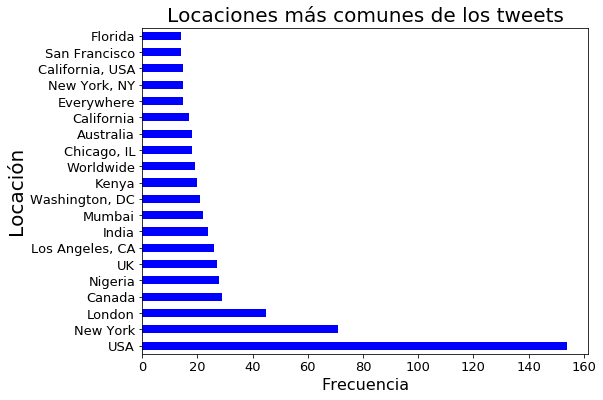

In [506]:
tweets_by_location.iloc[0:20].plot(kind = 'barh', figsize = (8,6), color = 'blue', fontsize = 13)
plt.xlabel('Frecuencia', fontsize = 16)
plt.ylabel('Locación', fontsize = 20)
plt.title('Locaciones más comunes de los tweets', fontsize  = 20)

Text(0.5, 1.0, 'Locaciones menos comunes de los tweets')

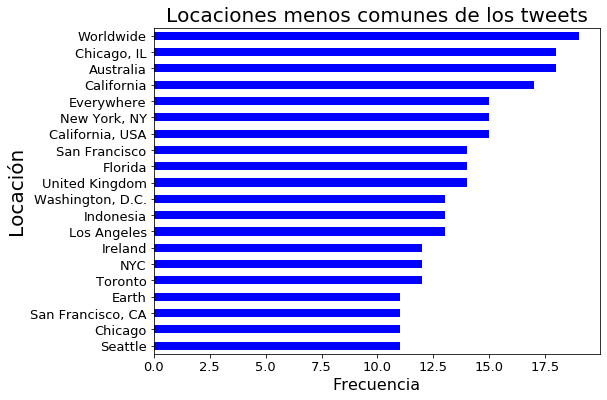

In [507]:
tweets_by_location_with_more_than_10 = tweets_by_location > 10
tweets_by_location[tweets_by_location_with_more_than_10].sort_values(ascending=True).iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'blue', fontsize = 13)
plt.xlabel('Frecuencia', fontsize = 16)   
plt.ylabel('Locación', fontsize = 20)
plt.title('Locaciones menos comunes de los tweets',fontsize  = 20)

In [508]:
real_tweets_by_location = true_tweets['location'].value_counts().sort_values(ascending=False).drop(labels='no location')
real_tweets_by_location             

USA                            94
Nigeria                        22
India                          20
Mumbai                         19
New York                       16
                               ..
CHICAGO                         1
Spokane, Washington             1
Joshua Tree, CA                 1
Miami,Fla                       1
Orbost, Victoria, Australia     1
Name: location, Length: 1512, dtype: int64

Text(0.5, 1.0, 'Locaciones más comunes de los tweets reales')

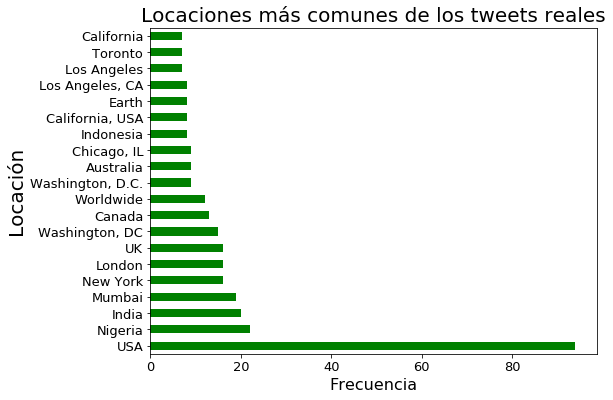

In [509]:
real_tweets_by_location.iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'green', fontsize = 13)
plt.xlabel('Frecuencia',fontsize = 16)                                      
plt.ylabel('Locación', fontsize = 20)
plt.title('Locaciones más comunes de los tweets reales',fontsize  = 20)

In [510]:
fake_tweets_by_location = false_tweets['location'].value_counts().sort_values(ascending=False).drop(labels='no location')
fake_tweets_by_location                            

USA                              60
New York                         55
London                           29
Los Angeles, CA                  18
Canada                           16
                                 ..
Spring Grove, IL                  1
dmv ?? fashion school @ KSU.      1
the moon                          1
illinois. united state            1
V-RP @OZRP_ ?MV, AU, R18+?        1
Name: location, Length: 2141, dtype: int64

Text(0.5, 1.0, 'Locaciones más comunes de los tweets falsos')

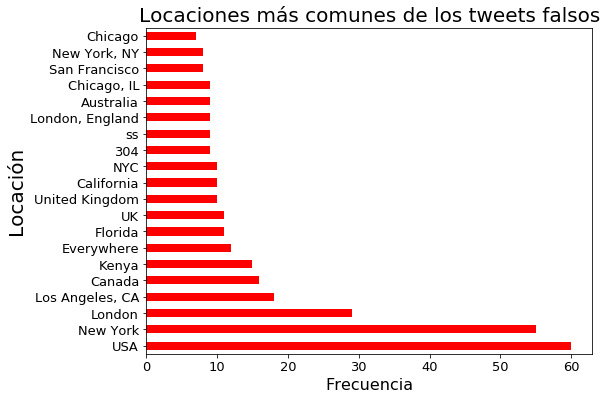

In [511]:
fake_tweets_by_location.iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'red', fontsize = 13)
plt.xlabel('Frecuencia', fontsize = 16)                               
plt.ylabel('Locación', fontsize = 20)
plt.title('Locaciones más comunes de los tweets falsos',fontsize  = 20)

In [512]:
tweets_by_loc = data.groupby('location').agg({'target':['sum','count','mean']})     
tweets_by_loc.columns = ['veracity_sum','veracity_count','veracity_mean']   
tweets_by_loc.sort_values(by='veracity_sum',ascending=False)

tweets_by_loc = tweets_by_loc.drop(tweets_by_loc[tweets_by_loc['veracity_count'] < 10].index)
tweets_by_loc.sort_values(by='veracity_sum',ascending=False)

,veracity_sum,veracity_count,veracity_mean
location,,,
no location,1075,2533,0.424398
USA,94,154,0.610390
Nigeria,22,28,0.785714
India,20,24,0.833333
Mumbai,19,22,0.863636
London,16,45,0.355556
New York,16,71,0.225352
UK,16,27,0.592593
"Washington, DC",15,21,0.714286


Text(0.5, 1.0, 'Locaciones con el mayor porcentaje de tweets reales')

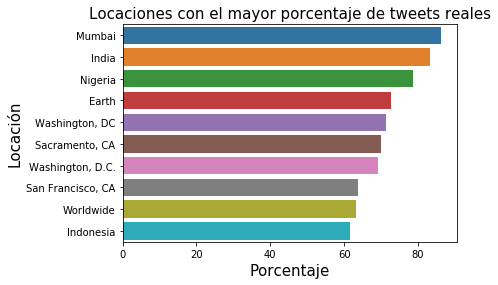

In [513]:
ax = sns.barplot(x=tweets_by_loc['veracity_mean'].nlargest(10) * 100,y=tweets_by_loc['veracity_mean'].nlargest(10).index,orient='h')
ax.set_xlabel("Porcentaje",fontsize = 15) 
ax.set_ylabel("Locación",fontsize = 15)
ax.set_title("Locaciones con el mayor porcentaje de tweets reales", fontsize = 15)

Text(0.5, 1.0, 'Locaciones con el menor porcentaje de tweets reales')

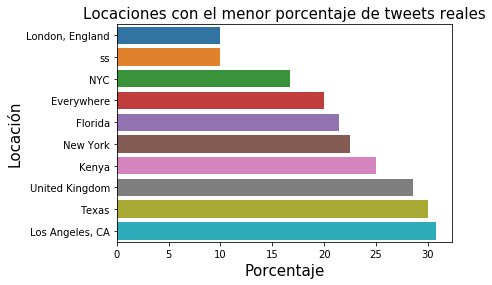

In [514]:
ax = sns.barplot(x=tweets_by_loc['veracity_mean'].nsmallest(10) * 100,y= tweets_by_loc['veracity_mean'].nsmallest(10).index,orient='h')
ax.set_xlabel("Porcentaje", fontsize = 15) 
ax.set_ylabel("Locación", fontsize = 15)
ax.set_title("Locaciones con el menor porcentaje de tweets reales", fontsize = 15)

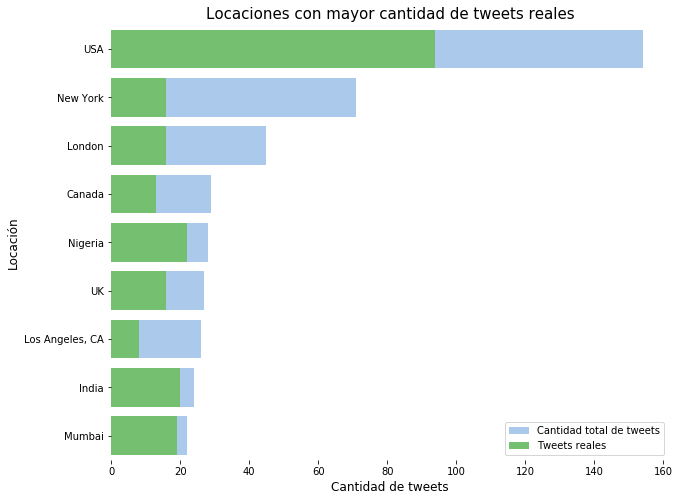

In [515]:
locations_most_tweets = tweets_by_loc['veracity_count'].nlargest(10).index.drop(labels='no location')

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=tweets_by_loc.loc[locations_most_tweets,'veracity_count'], y=locations_most_tweets, color="b",label="Cantidad total de tweets")
sns.set_color_codes("muted")
sns.barplot(x=tweets_by_loc.loc[locations_most_tweets,'veracity_sum'], y=locations_most_tweets, color="g",label="Tweets reales")
sns.set_color_codes("pastel")


ax.set_title("Locaciones con mayor cantidad de tweets reales", fontsize = 15)
ax.set_ylabel("Locación", fontsize = 12)
ax.set_xlabel("Cantidad de tweets", fontsize = 12)
ax.legend(loc="lower right")
sns.despine(left=True, bottom=True)

In [516]:
undefined_locations = data[data.location == 'no location'] 
undefined_locations_veracity = undefined_locations.groupby('location').agg({'target':['mean']})
undefined_locations_veracity.columns = ['target_mean']
undefined_locations_veracity.head()
#promedio de veracidad de los tweets sin locación:

,target_mean
location,
no location,0.424398


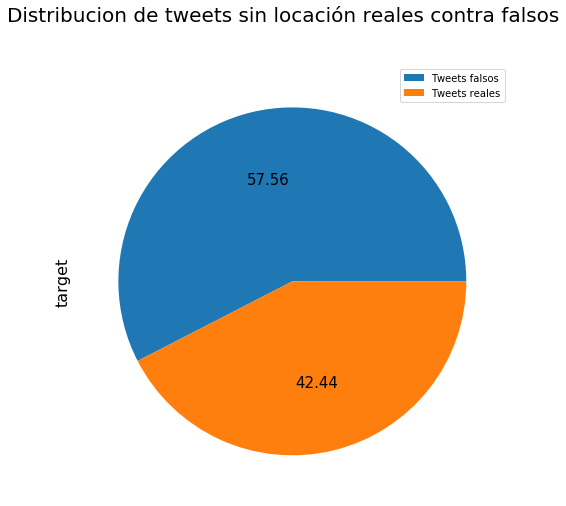

In [517]:
#Distribución de tweets sin locación reales contra falsos 
veracity_count = undefined_locations['target'].value_counts()
title = 'Distribucion de tweets sin locación reales contra falsos'
fig, ax= plt.subplots()
fig.suptitle(title, fontsize=20)
labels = ['Tweets falsos','Tweets reales']
plt.ylabel('Cantidad Total', fontsize=16)
veracity_count.plot(kind='pie',figsize=(10,8),autopct='%.2f',labels=['',''],fontsize=15)
ax.legend(labels);

In [518]:
location_group = data.groupby('location').agg({'target':'sum'})
location_group.columns = ['target_sum']
location_group['total_target_percentage'] = (location_group['target_sum'] * 100)/total_true_tweets
location_group.sort_values(['total_target_percentage'], ascending=False).head(15)
#porcentaje del total de tweets verdaderos según la locación

,target_sum,total_target_percentage
location,,
no location,1075,32.864567
USA,94,2.873739
Nigeria,22,0.672577
India,20,0.611434
Mumbai,19,0.580862
London,16,0.489147
New York,16,0.489147
UK,16,0.489147
"Washington, DC",15,0.458575


Text(0, 0.5, 'Porcentaje de veracidad')

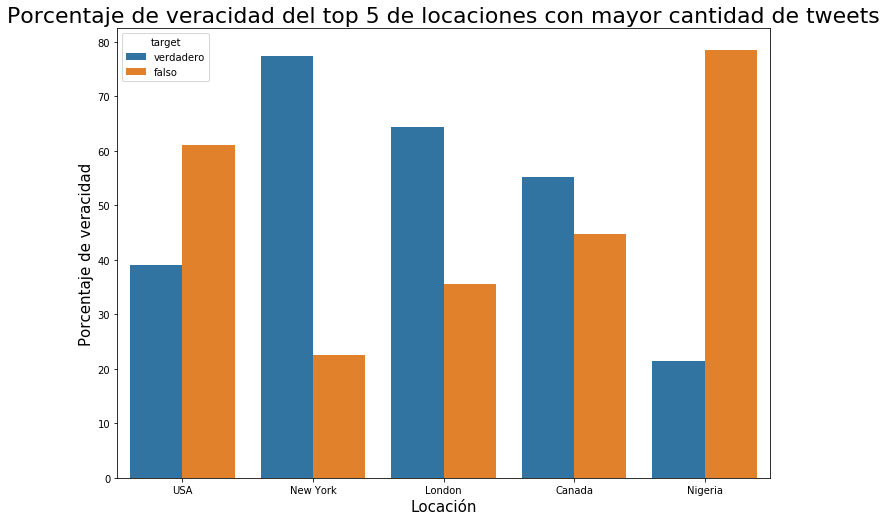

In [519]:
#Porcentajes de veracidad de top 5 de locaciones con mayor cantidad de tweets
only_real_locations = data[data.location != 'no location']
cant_tweet_by_location_by_target = only_real_locations.loc[ : ].groupby(['location','target']).agg({'target':'count'})
cant_tweet_by_location_by_target.columns = ['cantidad']
cant_total_tweet_by_location = cant_tweet_by_location_by_target.groupby('location').transform("sum")
porcentaje=(cant_tweet_by_location_by_target / cant_total_tweet_by_location)*100
porcentaje=porcentaje.unstack()
porcentaje.columns=['verdadero','falso']
porcentaje=porcentaje.reset_index()
total_por_location=only_real_locations.loc[:,:].groupby('location')['target'].count().nlargest(5).reset_index()
porcentaje_por_location=pd.merge(total_por_location,porcentaje,how='left',on='location')
porcentaje_por_location=porcentaje_por_location.loc[:,['location','verdadero','falso']]
plot_porcentaje=pd.melt(porcentaje_por_location, id_vars="location",var_name="target" ,value_name="survival rate")
 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(x='location', y='survival rate', hue='target',data=plot_porcentaje, ax=ax)

g.set_title("Porcentaje de veracidad del top 5 de locaciones con mayor cantidad de tweets", fontsize=22)
g.set_xlabel("Locación", fontsize=15)
g.set_ylabel("Porcentaje de veracidad", fontsize=15)

Text(0, 0.5, 'Promedio de longitud de tweets verdaderos')

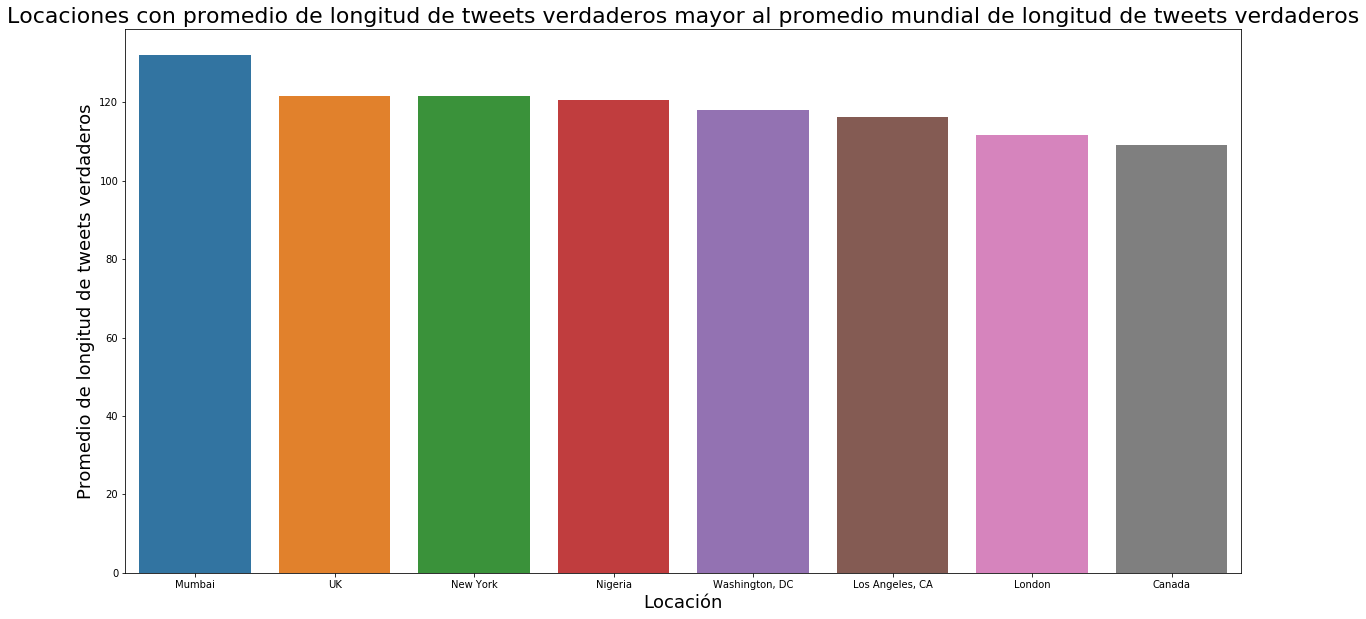

In [520]:
#locaciones con promedio de longitud de tweet verdadero mayor al promedio mundial de tweet verdaderos   

#promedio mundial de longitud de tweet falsos y verdaderos

total_length_mean_T = data.loc[data['target']==1,'length'].mean()
total_length_mean_F = data.loc[data['target']==0,'length'].mean()
mean_x_loc_target = data.loc[:].groupby(['location','target']).agg({'length':'mean'})
mean_x_loc_target = mean_x_loc_target.unstack()
mean_x_loc_target.columns = ['mean_length_F','mean_length_V']
mean_x_loc_target = mean_x_loc_target.reset_index()
#aca agarro las locaciones con por lo menos 40 tweet hechos, sino da cualquier 
#resultado(locaciones con un solo tweet que gana al promedio de verdadero o falso)
loc_high_tweet_count = data.loc[:].groupby('location')['target'].count() > 20
loc_high_tweet_count = loc_high_tweet_count.to_frame().reset_index()['target']
#agrego una columna boolean que calcule antes para filtrar solo locaciones que sean mayor a 40 tweet
mean_x_loc_target['over_40_tweets'] = loc_high_tweet_count
mean_x_loc_target = mean_x_loc_target[mean_x_loc_target['over_40_tweets']]
mean_x_loc_target['total_length_mean_F'] = total_length_mean_F
mean_x_loc_target['total_length_mean_T'] = total_length_mean_T
mean_x_loc_target['length_mean_over_total_T_mean']=mean_x_loc_target['mean_length_V']>mean_x_loc_target['total_length_mean_T']
loc_mean_over_total_mean = mean_x_loc_target[mean_x_loc_target['length_mean_over_total_T_mean']]
d = loc_mean_over_total_mean[['location', 'mean_length_V', 'total_length_mean_T']].nlargest(9,'mean_length_V')

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
g = sns.barplot(x = 'location', y = 'mean_length_V', data = d, ax = ax)
g.set_title("Locaciones con promedio de longitud de tweets verdaderos mayor al promedio mundial de longitud de tweets verdaderos", fontsize=22)
g.set_xlabel("Locación", fontsize = 18)
g.set_ylabel("Promedio de longitud de tweets verdaderos", fontsize = 18)


Text(0, 0.5, 'Promedio de longitud de tweets falsos')

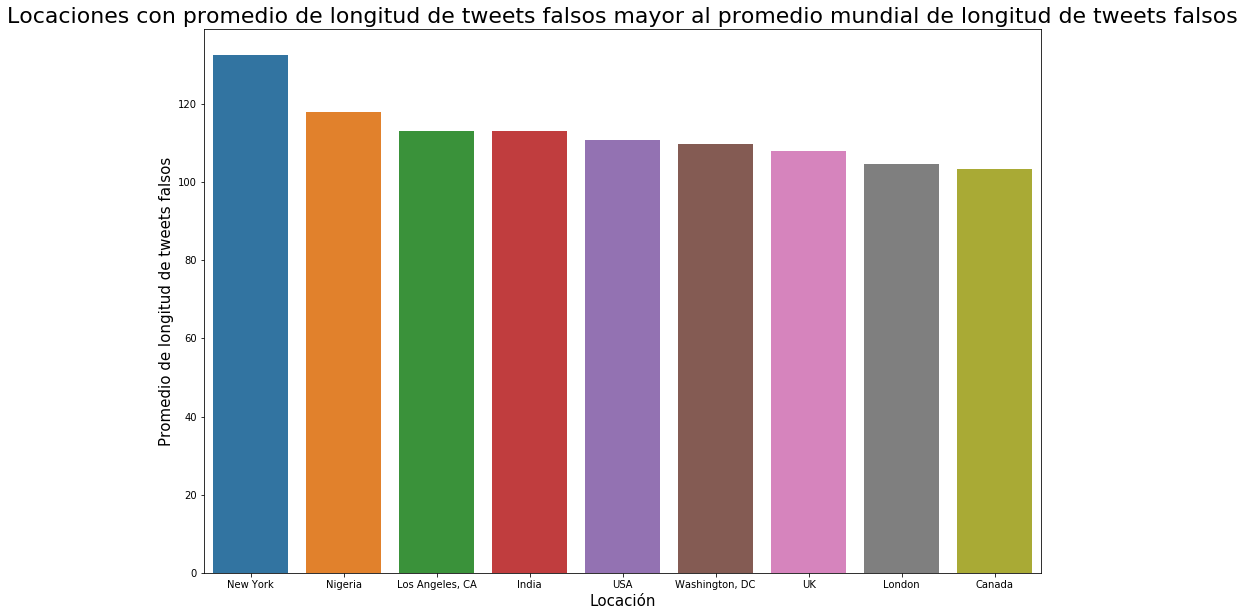

In [521]:
mean_x_loc_target['length_mean_over_total_T_mean']=mean_x_loc_target['mean_length_F']>mean_x_loc_target['total_length_mean_F']
loc_mean_over_total_mean = mean_x_loc_target[mean_x_loc_target['length_mean_over_total_T_mean']]
d = loc_mean_over_total_mean[['location', 'mean_length_F', 'total_length_mean_F']].nlargest(9, 'mean_length_F')

#locaciones con promedio de longitud de tweet verdadero mayor al promedio mundial de tweet verdaderos 

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
g = sns.barplot(x ='location', y = 'mean_length_F', data = d, ax = ax)
g.set_title("Locaciones con promedio de longitud de tweets falsos mayor al promedio mundial de longitud de tweets falsos", fontsize = 22)
g.set_xlabel("Locación", fontsize = 15)
g.set_ylabel("Promedio de longitud de tweets falsos", fontsize = 15)

**Análisis de texto**

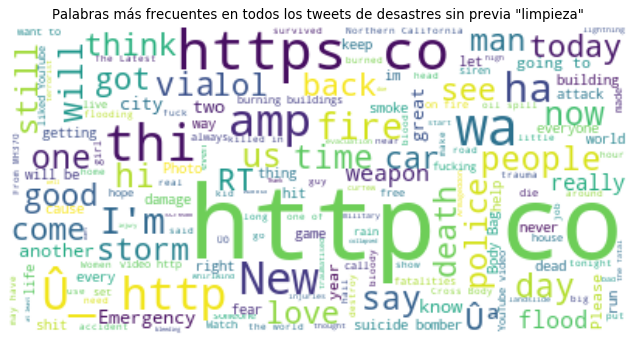

In [522]:
#Wordcloud de palabras más frecuentes en todos los tweets sin previa "limpieza"
wordcloud = WordCloud(background_color = "white").generate(' '.join(data['text']))     
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title('Palabras más frecuentes en todos los tweets de desastres sin previa "limpieza"')
plt.show()

In [523]:
#Hay muchas url en los tweets sin ningún tipo de "limpieza"
data[data['text'].str.contains(pat = 'http')]

,id,keyword,location,text,target,length,clean_text,keyword_length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,bbcmtd wholesale market ablaze,6
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,always try bring heavy metal rt,6
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,africanbaze breaking newsnigeria flag set abla...,6
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,plus side look sky last night ablaze,6
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55,inec office abia set ablaze,6
...,...,...,...,...,...,...,...,...
7606,10866,no keyword,no location,Suicide bomber kills 15 in Saudi security site...,1,121,suicide bomber kill saudi security site mosque...,10
7607,10867,no keyword,no location,#stormchase Violent Record Breaking EF-5 El Re...,1,134,stormchase violent record breaking ef el reno ...,10
7608,10869,no keyword,no location,Two giant cranes holding a bridge collapse int...,1,83,two giant crane holding bridge collapse nearby...,10
7610,10871,no keyword,no location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,utckm volcano hawaii,10


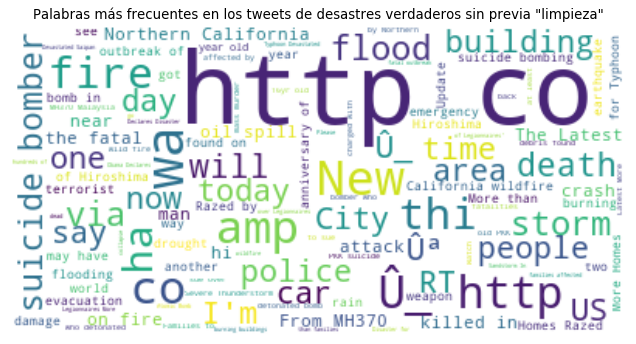

In [524]:
#Wordcloud de palabras más frecuentes en tweets verdaderos sin previa limpieza
wordcloud = WordCloud(background_color = "white").generate(' '.join(true_tweets['text']))
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title('Palabras más frecuentes en los tweets de desastres verdaderos sin previa "limpieza"')
plt.show()  

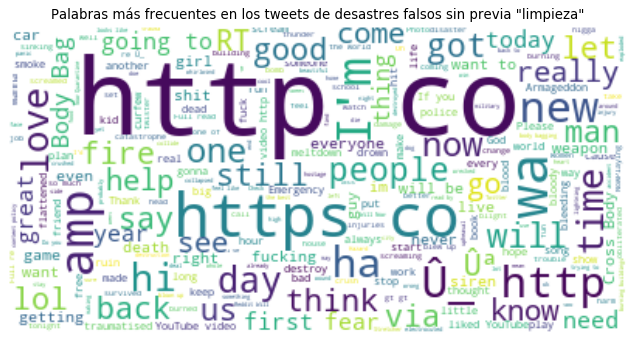

In [525]:
#Wordcloud de palabras mas frecuentes en tweets falsos sin previa limpieza 
wordcloud = WordCloud(background_color="white",max_words = 2500).generate(' '.join(false_tweets['text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Palabras más frecuentes en los tweets de desastres falsos sin previa "limpieza"')
plt.show()  

In [526]:
data['clean_text'] = data['clean_text'].apply(lambda text: re.sub(r'amp | im', '', text))
#reinicio data_grouped, false_tweets, y true_tweets con el nuevo reemplazo en clean_text
data_grouped = data.groupby('target')
false_tweets = data_grouped.get_group(0)
true_tweets = data_grouped.get_group(1)

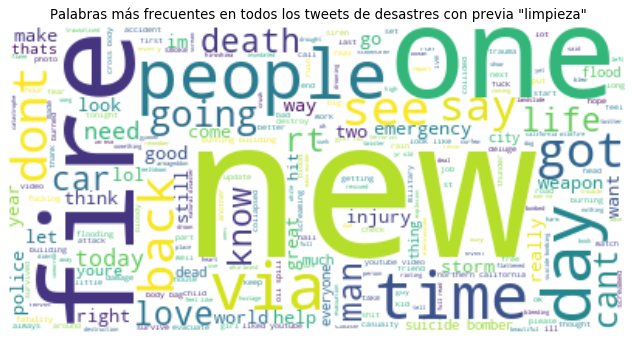

In [527]:
#Wordcloud de palabras mas frecuentes en todos los tweets (reales y falsos) con los tweets "limpios" sin &amp
wordcloud = WordCloud(background_color = "white",max_words = 400).generate(' '.join(data['clean_text']))
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title('Palabras más frecuentes en todos los tweets de desastres con previa "limpieza"')
plt.show()

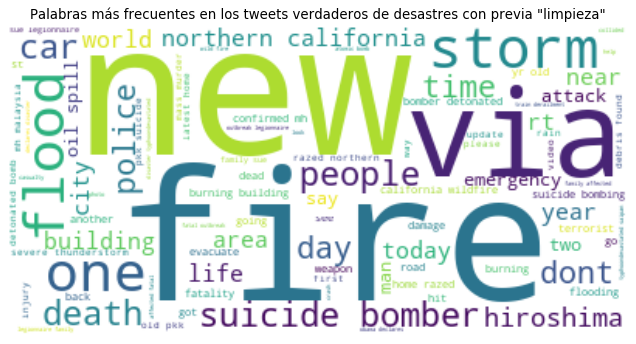

In [528]:
#Wordcloud de palabras más frecuentes en tweets verdaderos con los tweets "limpios" 
wordcloud = WordCloud(background_color = "white").generate(' '.join(true_tweets['clean_text']))
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title('Palabras más frecuentes en los tweets verdaderos de desastres con previa "limpieza"')
plt.show()

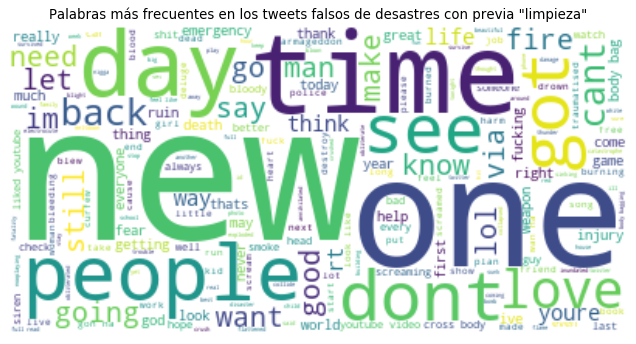

In [529]:
#Wordcloud de palabras más frecuentes en tweets falsos con los tweets "limpios"        
wordcloud = WordCloud(background_color="white").generate(' '.join(false_tweets['clean_text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Palabras más frecuentes en los tweets falsos de desastres con previa "limpieza"')
plt.show()

[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

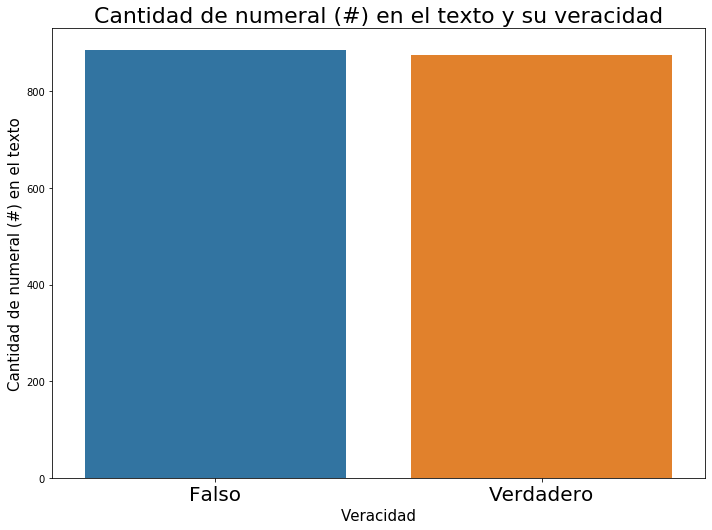

In [530]:
cant_numeral_veracidad = data['text'].str.contains('#').groupby(data['target']).sum().reset_index()
cant_numeral_veracidad.columns = ['veracidad','cantidad']
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x = 'veracidad', y = 'cantidad', data=cant_numeral_veracidad, ax = ax)
g.set_title("Cantidad de numeral (#) en el texto y su veracidad", fontsize = 22)
g.set_xlabel("Veracidad",fontsize = 15)
g.set_ylabel("Cantidad de numeral (#) en el texto", fontsize = 15)
g.set_xticklabels(['Falso','Verdadero'], rotation = 'horizontal', fontsize = 20)


[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

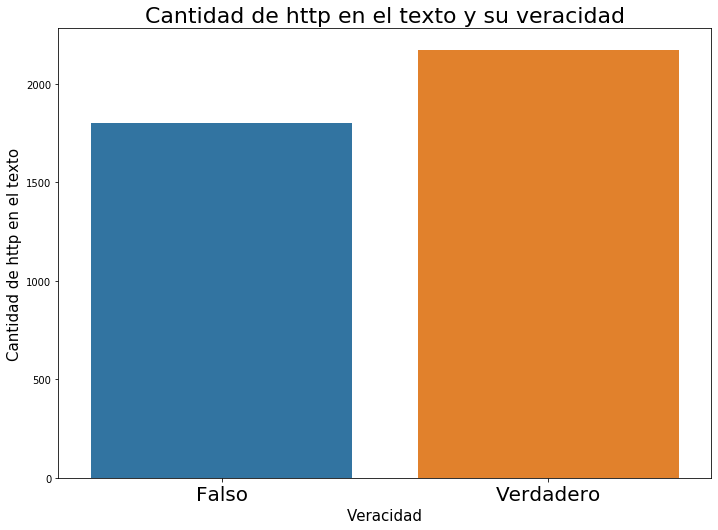

In [531]:
cant_http_veracidad = data['text'].str.contains('http').groupby(data['target']).sum().reset_index()
cant_http_veracidad.columns = ['veracidad','cantidad']
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
 
g = sns.barplot(x = 'veracidad', y = 'cantidad', data = cant_http_veracidad, ax = ax)
g.set_title("Cantidad de http en el texto y su veracidad", fontsize = 22)
g.set_xlabel("Veracidad",fontsize = 15)
g.set_ylabel("Cantidad de http en el texto", fontsize = 15)
g.set_xticklabels(['Falso','Verdadero'], rotation = 'horizontal', fontsize = 20)